# SETTING UP MY ENVIRONMENT

## Download necessary modules

In this notebook, we are going to use several Python3 modules:
- [numpy](https://render.githubusercontent.com/view/www.numpy.org) is the fundamental package for scientific computing with Python.
- np.random.seed(1234) is used to keep all the random function calls consistent. It will help us grade your work.
- [matplotlib](http://matplotlib.org/) is a library to plot graphs in Python.
- [pandas](https://pandas.pydata.org) is an open source, easy-to-use data structures and data analysis tools for the Python programming language.
- [Keras](https://keras.io/) is a high-level neural networks API, written in Python and capable of running on top of TensorFlow.
- [wordcloud](https://github.com/amueller/word_cloud) is an opensource cloud generator module in Python.
In the following cell, we are going to install **wordcloud** module as an example

In [5]:
#install wordCloud
!pip install wordcloud

    100% |████████████████████████████████| 368kB 8.5MB/s 


# Begin Coding

In this notebook, we will use a Deep Learning / Neural Network approach that is up and coming with recent development in machine learning and AI technologies. This code is based on the approach outlined in Alkahest's blog post [Collaborative Filtering in Keras](http://www.fenris.org/2016/03/07/index-html) and [James Lee's project](https://github.com/khanhnamle1994/movielens) as well.
![Movie Recommendation](static/cover.jpg)

In [6]:
import pandas as pd
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import keras
from wordcloud import WordCloud
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


# Import data

Here, we are going to use a sample of [MovieLens](https://movielens.org) corpus which is run by GroupLens. GroupLens is a research lab at the University of Minnesota, USA. MovieLens is non-commercial, and free of advertisements. MovieLens is considered one of the most common datasets that is available on the internet for building a Recommender Systems. The version of the dataset that we are going to be working with contains 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.
Here’s a word-cloud visualization of the movie titles:
![MovieLens WordCloud](static/wordcloud.png)
Beautiful, isn’t it? I can recognize that there are a lot of movie franchises in this dataset, as evidenced by words like II and III… In addition to that, Day, Love, Life, Time, Night, Man, Dead, American are among the most commonly occuring words.

Here’s a distribution of the user ratings:
![MovieLens ratings](static/rating.png)
It appears that users are quite generous in their ratings. The mean rating is 3.58 on a scale of 5. Half the movies have a rating of 4 and 5. I personally think that a 5-level rating skill wasn’t a good indicator as people could have different rating styles (i.e. person A could always use 4 for an average movie, whereas person B only gives 4 out for their favorites). Each user rated at least 20 movies, so I doubt the distribution could be caused just by chance variance in the quality of movies.
Here’s another word-cloud of the movie genres:
![MovieLens Genres WordCloud](static/genres.png)
The top 5 genres are, in that respect order: Drama, Comedy, Action, Thriller, and Romance.

In [31]:
DIR = 'data'
# Reading rating file
dataset = pd.read_csv(os.path.join(DIR, "ratings.zip"), compression='zip', sep='::', \
                 names=['real_user_id','real_movie_id','rating','timestamp'], header=None, usecols=['real_user_id','real_movie_id','rating'])
#Convert user and movie ids from int to categories
dataset['user_id'] = dataset['real_user_id'].astype('category').cat.codes.values
dataset['movie_id'] = dataset['real_movie_id'].astype('category').cat.codes.values
print(dataset.shape)
print(dataset.columns)

(1000209, 5)
Index(['real_user_id', 'real_movie_id', 'rating', 'user_id', 'movie_id'], dtype='object')


In [36]:
dataset

,real_user_id,real_movie_id,rating,user_id,movie_id
0,1,1193,5,0,1104
1,1,661,3,0,639
2,1,914,3,0,853
3,1,3408,4,0,3177
4,1,2355,5,0,2162
5,1,1197,3,0,1107
6,1,1287,5,0,1195
7,1,2804,5,0,2599
8,1,594,4,0,580
9,1,919,4,0,858


In [32]:
# Reading movies file
movies = pd.read_csv(os.path.join(DIR, 'movies.dat'), sep='::', encoding='latin-1', 
                     names=['movie_id', 'title', 'genres'], header=None)

print(movies.shape)
print(movies.columns)

(3883, 3)
Index(['movie_id', 'title', 'genres'], dtype='object')


In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2)

# Build model

The idea of using deep learning is similar to that of Model-Based Matrix Factorization. In matrix factorization, we decompose our original sparse matrix into product of 2 low rank orthogonal matrices. For deep learning implementation, we don’t need them to be orthogonal, we want our model to learn the values of embedding matrix itself. The user latent features and movie latent features are looked up from the embedding matrices for specific movie-user combination. These are the input values for further linear and non-linear layers. We can pass this input to multiple relu, linear or sigmoid layers and learn the corresponding weights by any optimization algorithm (Adam, SGD, etc.).

Here are the main components of my neural network:
![Model](static/embedding-layers.png)

- A left embedding layer that creates a Users by Latent Factors matrix.
- A right embedding layer that creates a Movies by Latent Factors matrix.
- When the input to these layers are (i) a user id and (ii) a movie id, they’ll return the latent factor vectors for the user and the movie, respectively.
- A merge layer that takes the dot product of these two latent vectors to return the predicted rating.


I then compile the model using Mean Squared Error (MSE) as the loss function and the AdaMax learning algorithm.

In [0]:
def buildNN(n_users, n_movies, n_latent_factors):
    movie_input = keras.layers.Input(shape=[1],name='Item')
    movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='Movie-Embedding')(movie_input)
    movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

    user_input = keras.layers.Input(shape=[1],name='User')
    user_embedding = keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input)
    user_vec = keras.layers.Flatten(name='FlattenUsers')(user_embedding)

    prod = keras.layers.dot([movie_vec, user_vec], axes= 1, name='DotProduct')
    model = keras.Model([user_input, movie_input], prod)
    # model.compile('adam', 'mean_squared_error')
    model.compile(loss='mse', optimizer='adamax')
    return model

In [0]:
n_users, n_movies = len(dataset.user_id.unique()), len(dataset.movie_id.unique())
n_latent_factors = 500

model=buildNN(n_users, n_movies, n_latent_factors)

In [0]:
# SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [14]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 500)       1853500     Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 500)       3020500     User[0][0]                       
__________________________________________________________________________________________________
FlattenMov

In [0]:
# Callbacks monitor the validation loss# Callb 
# Save the model weights each time the validation loss has improved
callbacks = [EarlyStopping('val_loss', patience=2), 
             ModelCheckpoint('weights.h5', save_best_only=True)]


history = model.fit([train.user_id, train.movie_id], train.rating, epochs=10, validation_split=0.2, verbose=2, callbacks=callbacks)

In [0]:
# Show the best validation MAE
min_val_loss, idx = min((val, idx) for (idx, val) in enumerate(history.history['val_loss']))
print ('Minimum RMSE at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(abs(min_val_loss)))

In [0]:
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

In [0]:
model.load_weights('weights.h5')
y_hat = np.round(model.predict([test.user_id, test.movie_id]), 0)
y_true = test.rating # discrete values from 1 to 5

In [19]:
#see the first 10 entries
for i, j in zip(y_hat[:10], y_true[:10]):
    print("Predicted:", i[0], "\tTrue:", j)

Predicted: 3.0 	True: 4
Predicted: 4.0 	True: 5
Predicted: 2.0 	True: 2
Predicted: 4.0 	True: 4
Predicted: 5.0 	True: 5
Predicted: 4.0 	True: 5
Predicted: 3.0 	True: 3
Predicted: 4.0 	True: 5
Predicted: 4.0 	True: 4
Predicted: 3.0 	True: 2


## The Evaluation

During the training process above, I saved the model weights each time the validation loss has improved. Thus, I can use that value to calculate the best validation Root Mean Square Error.

In [20]:
from sklearn.metrics import mean_absolute_error
# mean_absolute_error(y_true[0:10], y_hat[0:10])
mean_absolute_error(y_true, y_hat)

0.49482108757161

## The Recommendation

In [37]:
#helper functino
def get_movie_ids(userID, rating):
    """
    This method takes a user id and rating and returns
    data frame contains only the movies ids that the 
    user has watched and rated the given rating
    """
    real_user_id = dataset.loc[(dataset['user_id'] == userID)]['real_user_id'].iloc[0]
    df = dataset.loc[(dataset['real_user_id'] == real_user_id)]
    return list(df[dataset['rating']== rating]['real_movie_id'])

get_movie_ids(5555, 5)

[2064,
 595,
 2080,
 919,
 3094,
 2138,
 2139,
 1196,
 1527,
 316,
 35,
 48,
 58,
 1200,
 1211,
 1214,
 1215,
 1264,
 1265,
 1274,
 2657,
 2662,
 471,
 2355,
 2390,
 2700,
 1046,
 2018,
 541]

In [38]:
#helper function
def get_movies_genres(movie_ids):
    """
    This method takes a list of movie ids and return their
    genres combines in a one text
    """
    genres = []
    for movie_id in movie_ids:
        genres.extend(list(movies[movies['movie_id']==movie_id]['genres'])[0].split('|'))
    return ' '.join(genres)

get_movies_genres(get_movie_ids(5555, 5))

"Comedy Documentary Animation Children's Musical Animation Children's Comedy Musical Romance Adventure Children's Drama Musical Drama Romance Animation Children's Drama Fantasy Animation Children's Action Adventure Drama Sci-Fi War Action Sci-Fi Action Adventure Sci-Fi Drama Romance Animation Children's Musical Romance Drama Romance Action Sci-Fi Thriller War Comedy Drama Romance Action Horror Sci-Fi Thriller Action Adventure Comedy Horror Sci-Fi Action Drama Mystery Romance Thriller Comedy Romance Adventure Animation Sci-Fi Thriller Comedy Horror Musical Sci-Fi Action Sci-Fi War Comedy Romance Animation Children's Comedy Comedy Animation Comedy Drama Romance Animation Children's Film-Noir Sci-Fi"

In [0]:
def recommend_movies(userID):
    #----- wordcloud of user movies -----
    user_genres = get_movies_genres(get_movie_ids(userID, rating=5))
    wordcloud = WordCloud().generate(user_genres)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    #------------------------------------
    predictedRatingsDF=pd.DataFrame(columns=['movie_id','rating'])
    for movie_id in list(set(dataset.movie_id)):
        predictedRating = model.predict([np.array([userID]),np.array([movie_id])])[0][0]
        real_movie_id = dataset.loc[(dataset['movie_id'] == movie_id)]['real_movie_id'].iloc[0]
        predictedRatingsDF.loc[predictedRatingsDF.shape[0]]=pd.Series({"movie_id":real_movie_id,
                                                                       "rating":predictedRating})
    df = predictedRatingsDF.sort_values(by=['rating'], ascending=False).reset_index(drop=True)[:20]
    #----- wordcloud of recommended movies -----
    text = get_movies_genres(list(df['movie_id']))
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    #-------------------------------------------
    return df

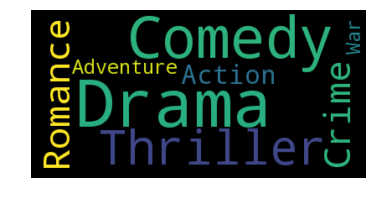

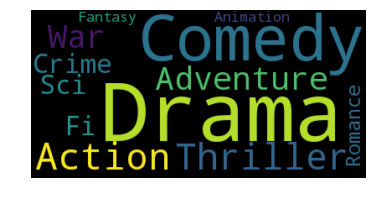

,movie_id,rating
0,2858.0,4.740695
1,1197.0,4.578429
2,2324.0,4.558189
3,318.0,4.548954
4,2997.0,4.521115
5,50.0,4.474805
6,1136.0,4.460687
7,2329.0,4.445384
8,2762.0,4.418952
9,593.0,4.384685


In [61]:
recommend_movies(userID = 666)